## Plotting a NDDataset

<div class='alert alert-info'>

**NOTE** : By default, all matplolib figures will be plotted **inline** in this notebook. 
to change this behaviour, uncomment the next line (which must be placed before importing the  ``spectrochempy`` library!

</div>

In [1]:
#%matplotlib  

In [2]:
from spectrochempy import *


        SpectroChemPy's API
        Version   : 0.1a2.6
        Copyright : 2014-2017, LCS - Laboratory for Catalysis and Spectrochempy
            


Let's first import a NDDataset from a file:

In [3]:
source = NDDataset.read_omnic(os.path.join(data_dir, 'irdata', 'NH4Y-activation.SPG'))
source

NDDataset([[    2.06,     2.06, ...,     2.01,     2.01],
           [    2.03,     2.04, ...,     1.91,     1.91],
           ..., 
           [    1.79,     1.79, ...,      1.2,      1.2],
           [    1.82,     1.82, ...,     1.24,     1.24]])

To plot a dataset, use the `plot` command (generic plot). As the current NDDataset is 2D, a contour plot is displayed by default.

<IPython.core.display.Javascript object>


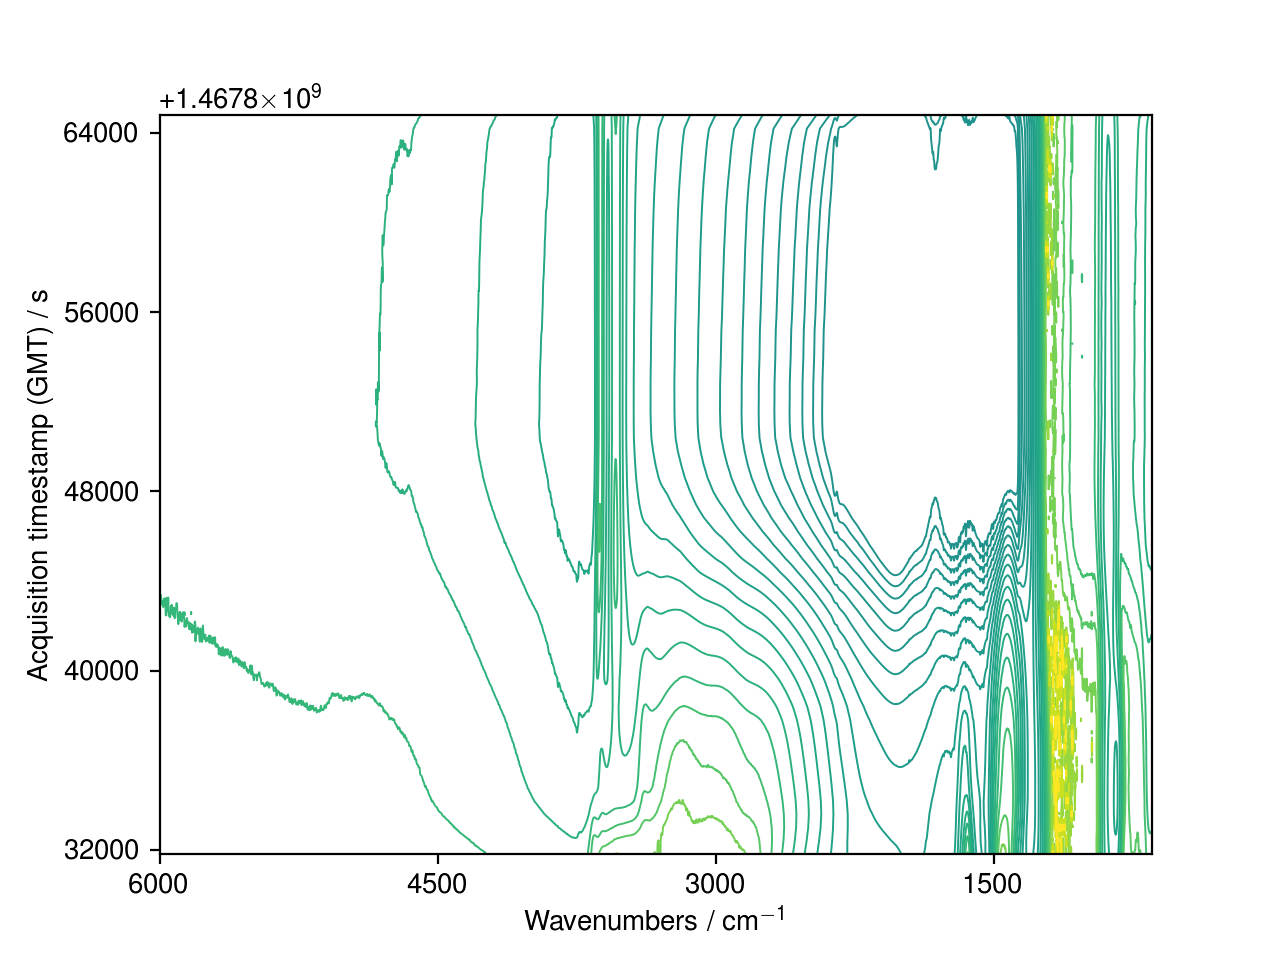

In [4]:
source.plot()  

The `y` axis with timestamp is not very informative, lets rescale it in hours and change the origin. 

<IPython.core.display.Javascript object>


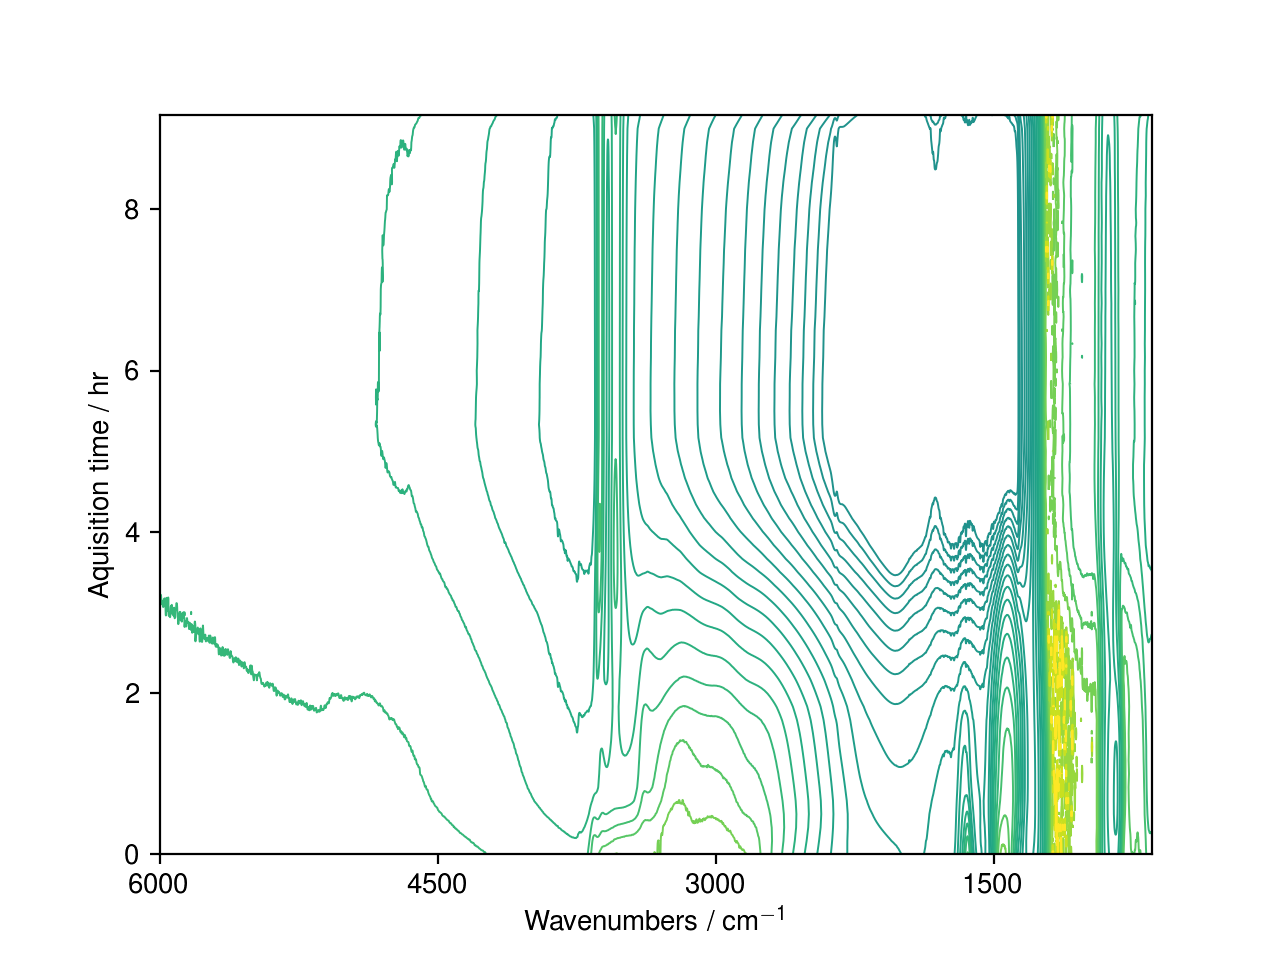

In [5]:
# modify axe Y
source.y -= source.y[0]   # change origin
source.y.title = u'Aquisition time'
source.y.to('hour') # change unit base
source.plot()

By default, plots are done in contour mode.

If you like to have stacked plot, you can use:

<IPython.core.display.Javascript object>


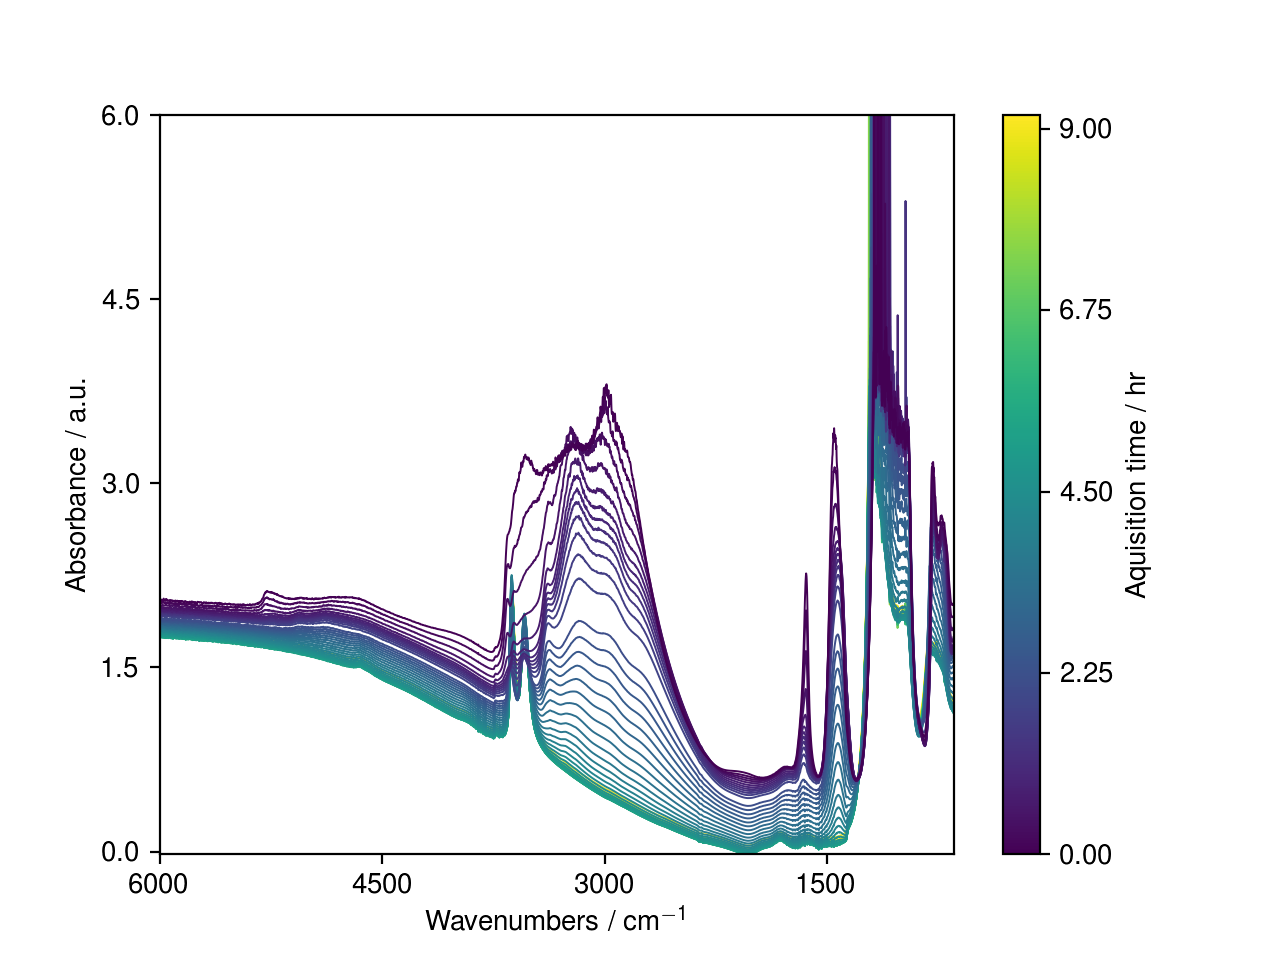

In [6]:
source.plot(kind='stack')

In [7]:
# keep this for later
#from datetime import datetime, timedelta
#date = lambda t: datetime.today() + timedelta(minutes=t)
#axe1.labels = [date(t) for t in axe1.data]
#axe1

We can change or add labels to axes after creation of the dataset